In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

# Annual Average Temperature: Time Series for Washington DC

## Individual Ensemble Members

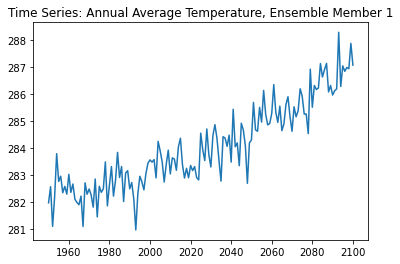

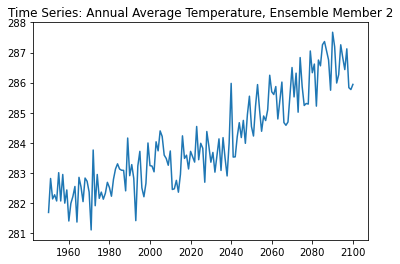

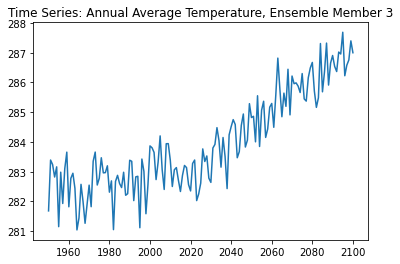

In [3]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

for i in range (0,3):
    ds = data.isel(ensemble=i)
    
    # Approximate coordinates of Washington DC
    ds = ds.sel(lon=283, lat=38.9, method='nearest')
    
    # Create figure and axes
    fig, ax = plt.subplots()
    
    # Plot annual average
    ds_mean = ds.groupby('time.year').mean()
    ax.plot(np.unique(ds['time.year']),ds_mean['t_ref'])
    ax.set_title('Time Series: Annual Average Temperature, Ensemble Member ' + str(i+1))

## Ensemble Mean

Text(0.5, 1.0, 'Time Series: Annual Average Temperature, Ensemble Mean')

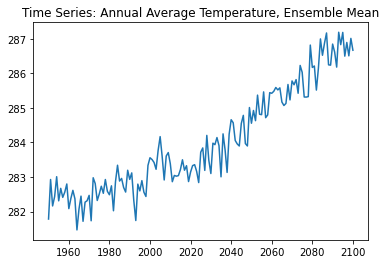

In [5]:
# Create figure and axes
fig, ax = plt.subplots()

# Isolate data near Washington DC
ds = data.sel(lon=283, lat=38.9, method='nearest')

# Calculate and plot annual average temperature across ensemble members
ds_avg = ds.mean(dim='ensemble').groupby('time.year').mean()
ax.plot(np.unique(data['time.year']),ds_avg['t_ref'])
ax.set_title('Time Series: Annual Average Temperature, Ensemble Mean')